<a href="https://colab.research.google.com/github/mayankawrr/EDA-Probability-Distributions/blob/main/Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To understand confidence intervals, let's first generate bernoulli data with 1000 samples, we call this population

Now inferential statistics is all about getting sample data(small number) and predicting population data information from it, with some confidence

In [13]:
import random

p = 0.4
n = 1000000
population = [random.choices([0, 1], weights=[1-p, p], k=1)[0] for _ in range(n)]

Let's pick random sample list of 100 samples from population list and try to find mean from it

In [3]:
import random

sample_size = 100
sample = random.sample(population, sample_size)

Generated a sample of size 100.


In [4]:
sample_mean = sum(sample) / len(sample)
print(f"The sample mean is: {sample_mean}")

The sample mean is: 0.35


In [6]:
import numpy as np

# Assuming sample_mean and p (population mean) are already defined
error = np.abs(sample_mean - p)

print(f"The absolute error between the sample mean and population mean is: {error:.4f}")

The absolute error between the sample mean and population mean is: 0.0500


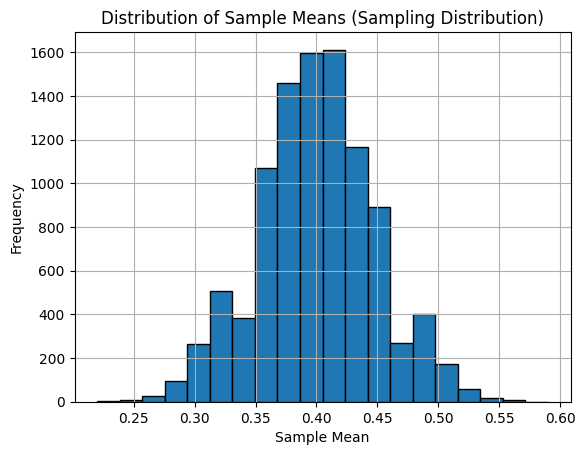

In [17]:
import matplotlib.pyplot as plt
import numpy as np

num_simulations = 10000
sample_means = []
sample_size = 100 # Using the same sample size as before

for _ in range(num_simulations):
    sample = random.sample(population, sample_size)
    sample_mean = sum(sample) / len(sample)
    sample_means.append(sample_mean)

plt.hist(sample_means, bins=20, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means (Sampling Distribution)')
plt.grid(True)
plt.show()

So we generated 100 samples and calculated their sample mean and then did the sampling process 10000 times from a population list of total 1000000 outcomes to plot the distribution of sample mean

# Confidence Interval

We need to have some confidence from our prediction that out calcualted sample mean is 90%, 84%, 99% close to the population mean so we calculate

Error = Population - Sample Mean

In [18]:
# Assuming sample_means list and population mean 'p' are already defined

errors = [p - sample_mean for sample_mean in sample_means]

# You can optionally print the first few errors to see the results
print("First 10 errors:")
for i in range(min(10, len(errors))):
    print(f"Error for simulation {i+1}: {errors[i]:.4f}")

# You can also calculate the average error or visualize the distribution of errors
# print(f"\nAverage Error: {np.mean(errors):.4f}")
# plt.hist(errors, bins=20, edgecolor='black')
# plt.xlabel('Error (Population Mean - Sample Mean)')
# plt.ylabel('Frequency')
# plt.title('Distribution of Errors')
# plt.grid(True)# plt.show()

First 10 errors:
Error for simulation 1: 0.0300
Error for simulation 2: -0.0200
Error for simulation 3: 0.0600
Error for simulation 4: 0.0100
Error for simulation 5: 0.0000
Error for simulation 6: 0.0400
Error for simulation 7: 0.0300
Error for simulation 8: -0.0400
Error for simulation 9: 0.1100
Error for simulation 10: -0.0100



For a normal distribution with a known standard deviation $\sigma$, the sample mean $\hat{\mu}$ follows a normal distribution:
$$\hat{\mu} \sim \text{Normal}\left(\mu, \frac{\sigma^2}{n}\right)$$
Probability Statement
The probability statement for the confidence interval is:
$$P\left( |\hat{\mu} - \mu| < \alpha \right) = \beta$$
Where:

$\hat{\mu}$: Sample mean
$\mu$: Population mean (unknown)
$\alpha$: Margin of error
$\beta$: Confidence level (e.g., $0.95$ for a 95% confidence interval)
$\sigma$: Known population standard deviation
$n$: Sample size

Standardized Form
This can be rewritten using the standard normal variable $Z$, where:
$$Z = \frac{\hat{\mu} - \mu}{\sigma / \sqrt{n}}$$
Thus, the probability statement becomes:
$$P\left( \left| \frac{\hat{\mu} - \mu}{\sigma / \sqrt{n}} \right| < \frac{\alpha}{\sigma / \sqrt{n}} \right) = \beta$$
Confidence Interval Formula
The confidence interval for the population mean $\mu$ is given by:
$$\hat{\mu} \pm z \cdot \frac{\sigma}{\sqrt{n}}$$
Where:

$z$: The z-score from the standard normal distribution corresponding to the confidence level $\beta$ (e.g., $z = 1.96$ for $\beta = 0.95$)
$\frac{\sigma}{\sqrt{n}}$: Standard error of the sample mean


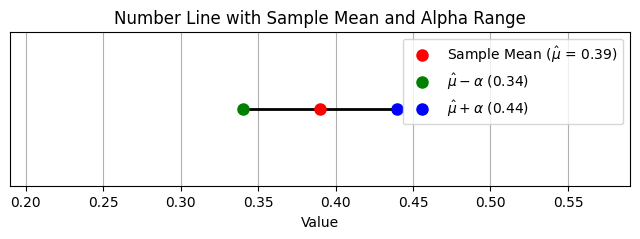

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming sample_mean is already calculated
alpha = 0.05

mu_hat = sample_mean # Using mu_hat to represent sample mean as per the markdown

plt.figure(figsize=(8, 2))
plt.plot([mu_hat - alpha, mu_hat + alpha], [0, 0], 'k-', lw=2)
plt.plot(mu_hat, 0, 'ro', markersize=8, label=r'Sample Mean ($\hat{\mu}$ = ' + f'{mu_hat:.2f})')
plt.plot(mu_hat - alpha, 0, 'go', markersize=8, label=r'$\hat{\mu} - \alpha$ (' + f'{mu_hat - alpha:.2f})')
plt.plot(mu_hat + alpha, 0, 'bo', markersize=8, label=r'$\hat{\mu} + \alpha$ (' + f'{mu_hat + alpha:.2f})')

plt.ylim(-0.1, 0.1)
plt.yticks([])
plt.xlabel('Value')
plt.title('Number Line with Sample Mean and Alpha Range')
plt.legend()
plt.grid(True)

# Rescale the x-axis
range_to_show = 2 * alpha # The range covered by mu_hat +/- alpha
total_range = range_to_show / 0.25 # To make this 25% of the total range
x_min = mu_hat - total_range / 2
x_max = mu_hat + total_range / 2
plt.xlim(x_min, x_max)

plt.show()

If we choose error to be 0.05 = alpha

Our interval of confidence is as follows

We have to find beta for this error margin

In [21]:
# Assuming sample_means list and population mean 'p' (mu) are already defined
# Assuming alpha is already defined as 0.05

mu = p # Using mu to represent the population mean
alpha = 0.05

# Count how many sample means are within the range [mu - alpha, mu + alpha]
count_within_range = sum(1 for mean in sample_means if mu - alpha < mean < mu + alpha)

# Calculate beta as the proportion of sample means within the range
beta = count_within_range / len(sample_means)

print(f"For alpha = {alpha}, the estimated beta is: {beta:.4f}")

For alpha = 0.05, the estimated beta is: 0.6380


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2021163806.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(mu - alpha, color='red', linestyle='dashed', linewidth=2, label=f'$\mu - \\alpha$ ({mu - alpha:.2f})')
/tmp/ipython-input-2021163806.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(mu + alpha, color='red', linestyle='dashed', linewidth=2, label=f'$\mu + \\alpha$ ({mu + alpha:.2f})')
/tmp/ipython-input-2021163806.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(mu, color='green', linestyle='solid', linewidth=2, label=f'Population Mean ($\mu$ = {mu:.2f})')


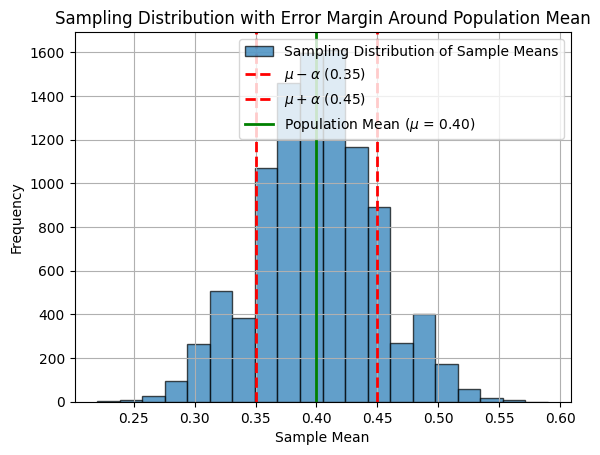

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming sample_means list and population mean 'p' (mu) are already defined
mu = p  # Population mean
alpha = 0.05 # The error margin

plt.hist(sample_means, bins=20, edgecolor='black', alpha=0.7, label='Sampling Distribution of Sample Means')

# Plot vertical lines for the range mu - alpha and mu + alpha
plt.axvline(mu - alpha, color='red', linestyle='dashed', linewidth=2, label=f'$\mu - \\alpha$ ({mu - alpha:.2f})')
plt.axvline(mu + alpha, color='red', linestyle='dashed', linewidth=2, label=f'$\mu + \\alpha$ ({mu + alpha:.2f})')
plt.axvline(mu, color='green', linestyle='solid', linewidth=2, label=f'Population Mean ($\mu$ = {mu:.2f})')


plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Sampling Distribution with Error Margin Around Population Mean')
plt.legend()
plt.grid(True)
plt.show()

With 63 % confidence we can say that out sample mean lies in the red band, from 0.35 to 0.45, error = 0.05

This is our sample mean distribution and since it is not exactly equal to population mean, we can still say some information about the population with some confidence based on our samples using these techniques

The same can also be done using some algebric manipulations without using any data, we can directly use normal tables to tell value of beta

In [23]:
import numpy as np
from scipy.stats import norm

# Assuming p (population mean) and sample_size are already defined
# For a Bernoulli distribution, the population standard deviation is sqrt(p*(1-p))
population_std_dev = np.sqrt(p * (1 - p))

# Calculate the standard error of the mean
standard_error = population_std_dev / np.sqrt(sample_size)

# Alpha value
alpha = 0.05

# We want to find P(|sample_mean - population_mean| < alpha) = P(|Z| < alpha / standard_error)
# Calculate the Z-score corresponding to alpha
z_score = alpha / standard_error

# Calculate the probability using the CDF of the standard normal distribution
# P(|Z| < z_score) = P(-z_score < Z < z_score) = CDF(z_score) - CDF(-z_score)
beta_theoretical = norm.cdf(z_score) - norm.cdf(-z_score)

print(f"Population Standard Deviation: {population_std_dev:.4f}")
print(f"Standard Error of the Mean: {standard_error:.4f}")
print(f"Z-score for alpha = {alpha}: {z_score:.4f}")
print(f"Theoretical beta for alpha = {alpha}: {beta_theoretical:.4f}")

Population Standard Deviation: 0.4899
Standard Error of the Mean: 0.0490
Z-score for alpha = 0.05: 1.0206
Theoretical beta for alpha = 0.05: 0.6926


See, theoretically we got value of beta to be 69%, which is very close ot out practically generated value